# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
TFile *file = TFile::Open("Tracks_Clusters.root");
//TFile *file = TFile::Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................


<p>The next step is to extract the varibles we want from the dataset. We will plot first an <b>"event"</b> variable: the number of primary vertices: 

In [4]:
// Variable NPV
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

// Variable mu_average
Float_t mu_average = -1;
tree->SetBranchAddress("mu_average", &mu_average);

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [5]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);

Now we define a histogram that will later be placed on this canvas. Its name is NPV and the header of the histogram is Example plot: Number of primary vertices. The three following arguments indicate that this histogram contains 50 so called bins which have a range from 1 to 50.

In [6]:
// Variable NPV
TH1F *hist_npv = new TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50);
// Variable mu_average
TH1F *hist_mu_average = new TH1F("mu_average","Average of mu; mu_average ; Events ",50,1,50);
// Variable NPV vs mu_average
TH2F *hist_npv_mu = new TH2F("npv_mu","NPV vs mu; NPV ; mu_average",50,1,50,50,1,50)

(TH2F *) 0x7f1650e877a0


The following lines are a loop that goes over the data that is stored in the tree and fills the histogram that we already defined. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word</p>
__Done!__.

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    // Variable NPV
    hist_npv->Fill(npv);
    // Variable mu_average
    hist_mu_average->Fill(mu_average);
    // Variable NPV vs mu_average
    hist_npv_mu->Fill(npv,mu_average);
}

std::cout << "Done!" << std::endl;

Done!


<p>After filling the histogram we want to see the results of the analysis. First we draw the histogram on the canvas and then the canvas on which the histogram lies:</p>

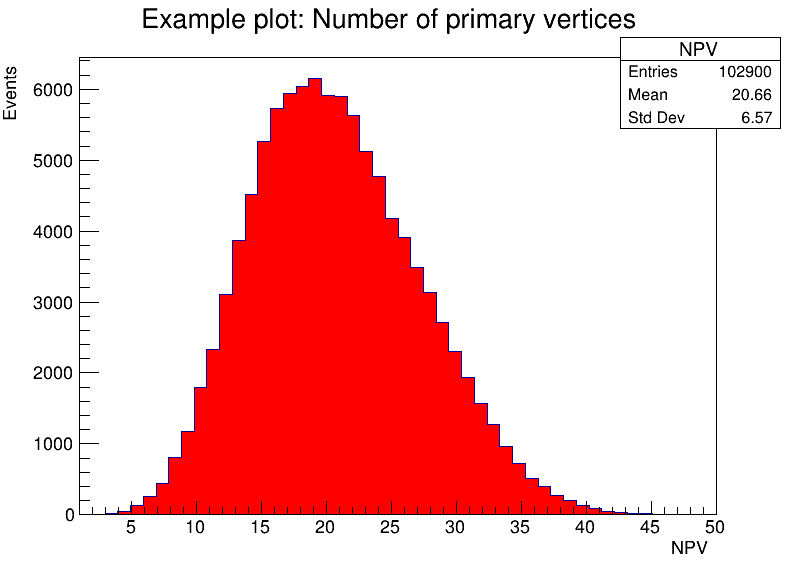

In [8]:
// Variable NPV
hist_npv->SetFillColor(kRed);
hist_npv->Draw();
canvas->Draw();

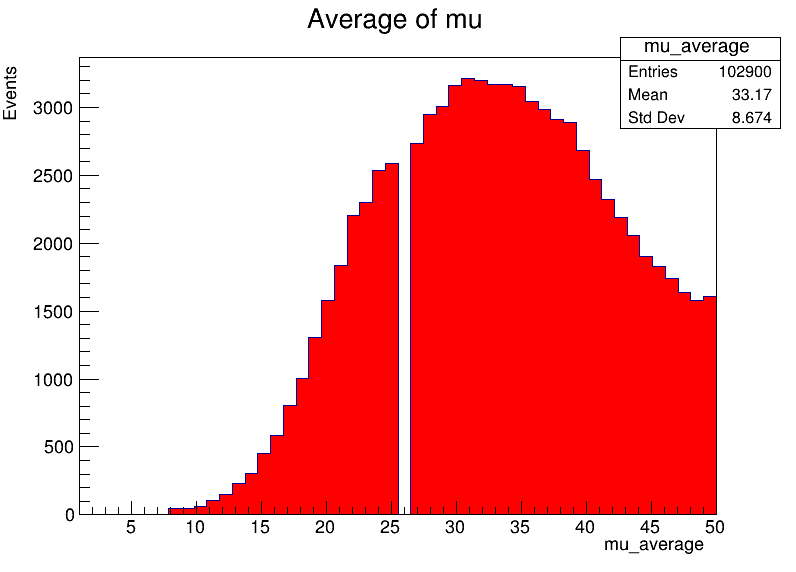

In [9]:
// Variable mu_average
hist_mu_average->SetFillColor(kRed);
hist_mu_average->Draw();
canvas->Draw();

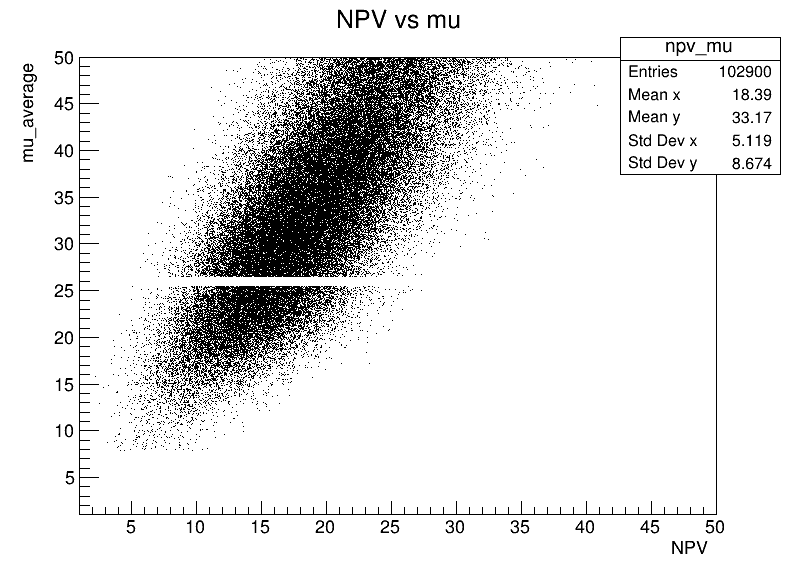

In [10]:
// Variable npv vs mu_average
hist_npv_mu->SetFillColor(kRed);
hist_npv_mu->Draw();
canvas->Draw();

In [12]:
// Variable NPV
Float_t scale_npv = hist_npv->Integral();
hist_npv->Scale(1/scale_npv);
hist_npv->SetFillColor(2);

// Variable mu_average
Float_t scale_mu_average = hist_mu_average->Integral();
hist_mu_average->Scale(1/scale_mu_average);
hist_mu_average->SetFillColor(2);

// Variable npv vs mu_average
Float_t scale_npv_mu = hist_npv_mu->Integral();
hist_npv_mu->Scale(1/scale_npv_mu);
hist_npv_mu->SetFillColor(2);

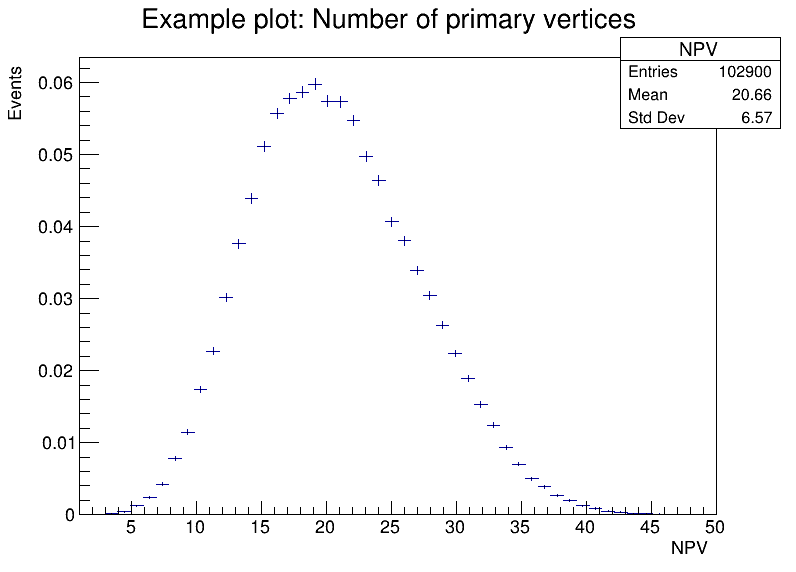

In [13]:
// Variable NPV
hist_npv->Draw();
canvas->Draw();

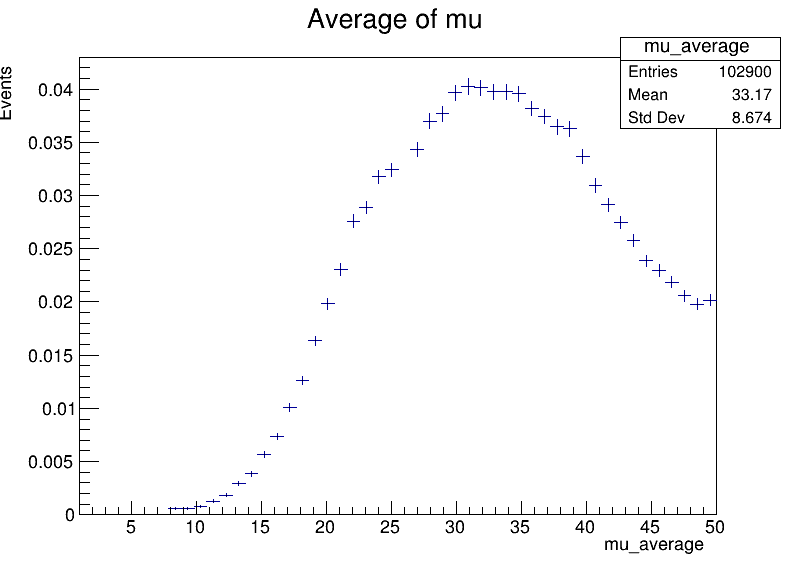

In [14]:
// Variable mu_average
hist_mu_average->Draw();
canvas->Draw();

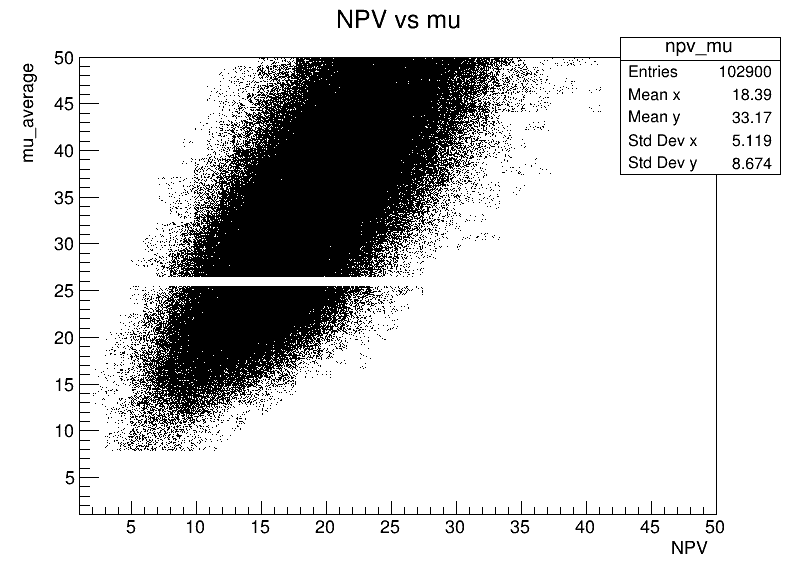

In [15]:
// Variable npv vs mu_average
hist_npv_mu->Draw();
canvas->Draw();

<b>Excercises: 
    1. Plot the number of average interactions per bunch-crossing (mu_average)
    2. Make a 2D histogram of NPV vs. mu
</b>

Some branches are not event variables, but objects with some kinematical infomation. They are stored in vectors. For example tracks and clusters. We will create two histograms to store the number of tracks and clusters in each event. 

In [16]:
TH1F *hist_nTrks = new TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,0,1000);
TH1F *hist_nCltrs = new TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,0,1000);

Now we activate two branches

In [17]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Clusters_pt", &clusters_pt);

For each event, fill the histograms with the size of the vectors

In [18]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_nTrks->Fill(tracks_pt->size());
    hist_nCltrs->Fill(clusters_pt->size());

}

std::cout << "Done!" << std::endl;

Done!


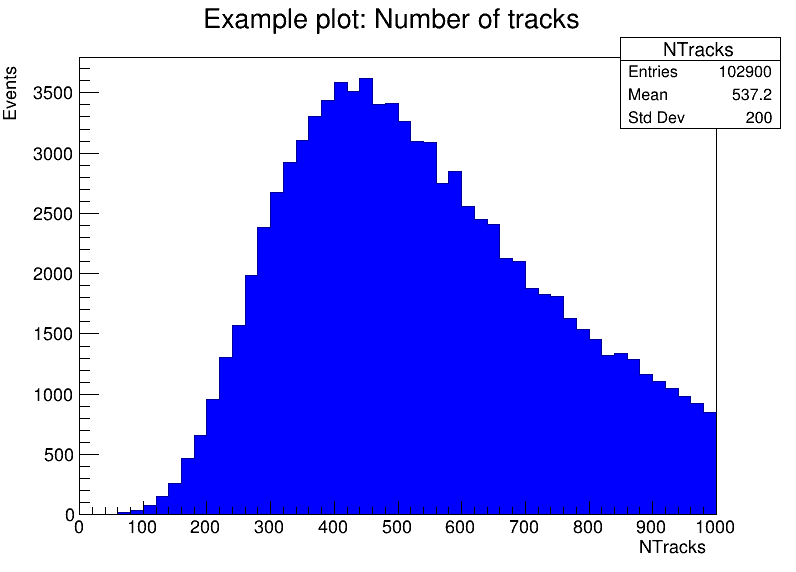

In [19]:
hist_nTrks->SetFillColor(kBlue);
hist_nTrks->Draw();
canvas->Draw();

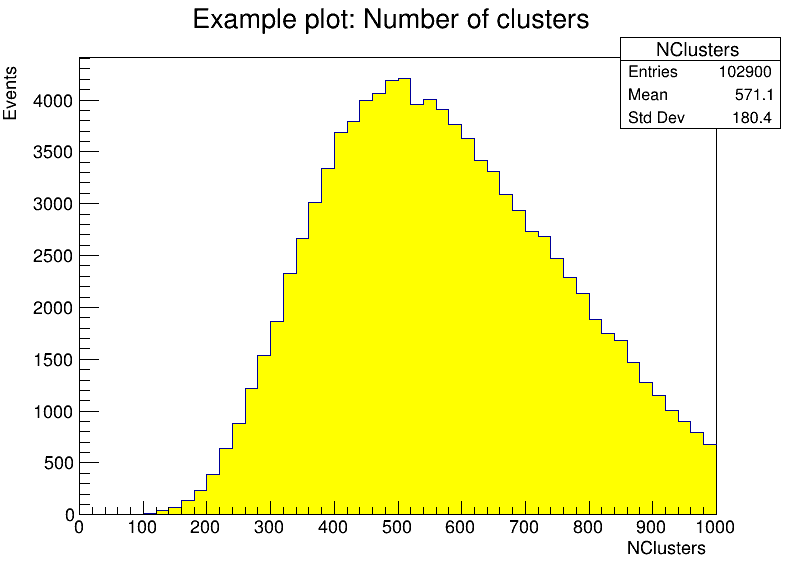

In [20]:
hist_nCltrs->SetFillColor(kYellow);
hist_nCltrs->Draw();
canvas->Draw();

In [22]:
// Variable NPV vs mu_average
TH2F *hist_npv_Trks = new TH2F("npv_Trks","NPV vs Tracks; NPV ; Tracks",50,1,50,50,1,1000);
// Variable NPV vs mu_average
TH2F *hist_mu_Trks = new TH2F("mu_Trks","mu vs Tracks; mu_average ; Tracks",50,1,50,50,1,1000);
// Variable NPV vs mu_average
TH2F *hist_npv_Cltrs = new TH2F("npv_Cltrs","NPV vs Clusters; NPV ; Clusters",50,1,50,50,1,1000);
// Variable NPV vs mu_average
TH2F *hist_mu_Cltrs = new TH2F("mu_Cltrs","mu vs _Clusters; mu_average ; Clusters",50,1,50,50,1,1000);

In [23]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    hist_npv_Trks->Fill(npv,tracks_pt->size());
    hist_mu_Trks->Fill(mu_average,tracks_pt->size());
    hist_npv_Cltrs->Fill(npv,clusters_pt->size());
    hist_mu_Cltrs->Fill(mu_average,clusters_pt->size());

}

std::cout << "Done!" << std::endl;

Done!


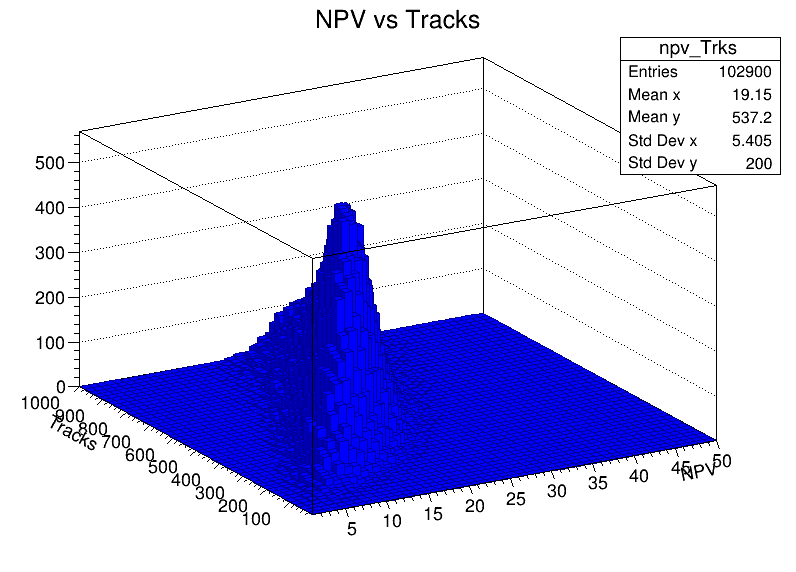

In [36]:
hist_npv_Trks->SetFillColor(kBlue);
hist_npv_Trks->Draw("LEGO1");
canvas->Draw();

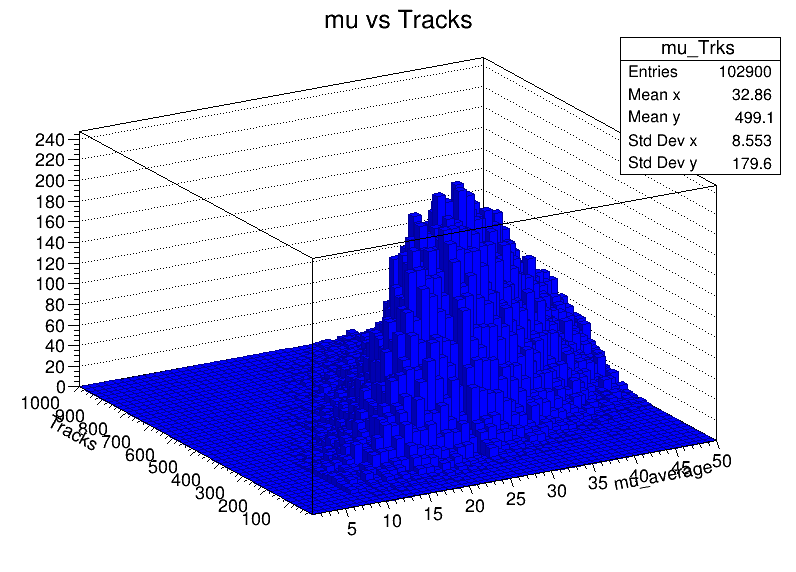

In [35]:
hist_mu_Trks->SetFillColor(kBlue);
hist_mu_Trks->Draw("Lego1");
canvas->Draw();

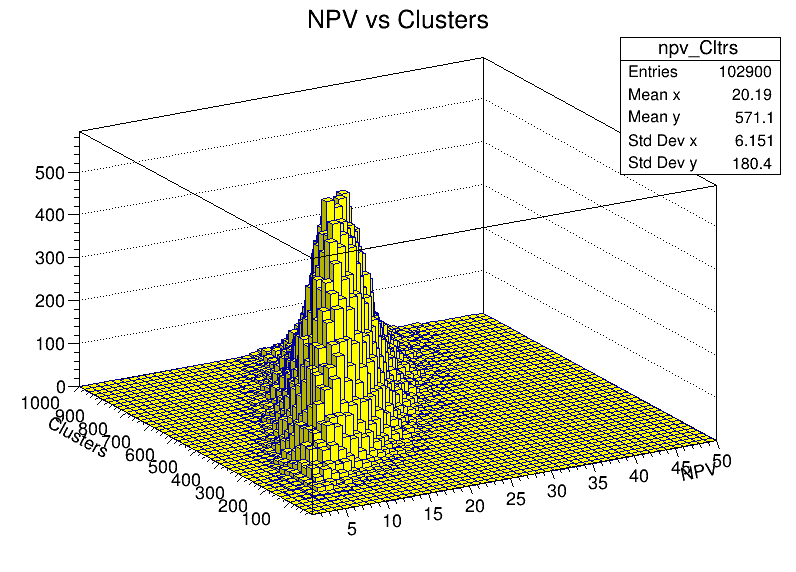

In [34]:
hist_npv_Cltrs->SetFillColor(kYellow);
hist_npv_Cltrs->Draw("LEGO1");
canvas->Draw();

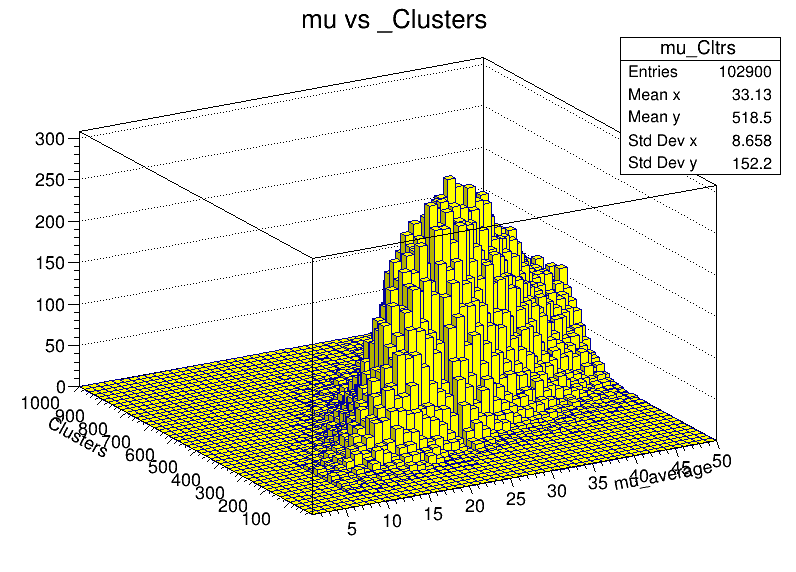

In [33]:
hist_mu_Cltrs->SetFillColor(kYellow);
hist_mu_Cltrs->Draw("LEGO1");
canvas->Draw();

<b>Excercise: 
    3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters
</b>

Now let us plot the pT of the "lead" track:

In [17]:
TH1F *hist_lead_track_pT = new TH1F("Lead_Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000);

In [18]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++)
    {
        hist_lead_track_pT->Fill(tracks_pt->at(tr));
    }

}

std::cout << "Done!" << std::endl;

Done!


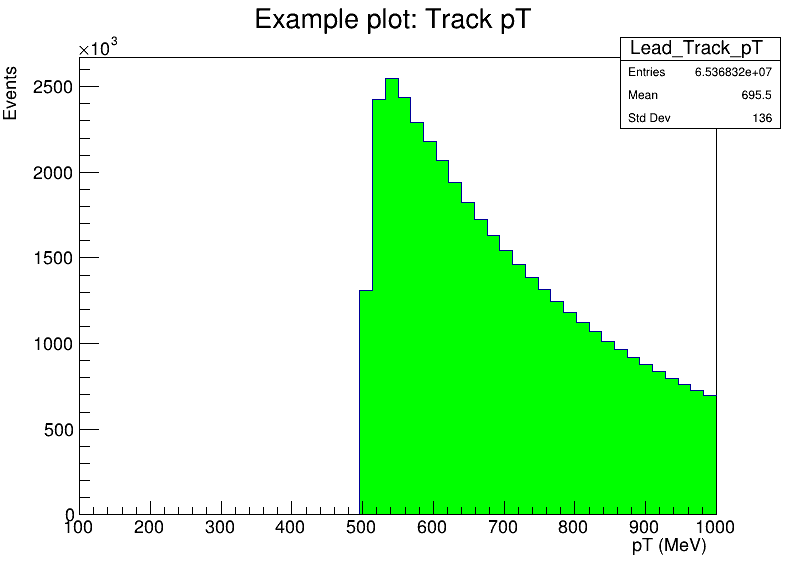

In [19]:
hist_lead_track_pT->SetFillColor(kGreen);
hist_lead_track_pT->Draw();
canvas->Draw();

<b>Excercises: 
4. Plot all track and cluster variables
5. Interpret the meaning of each variable
6. What is "Particle PDG ID"?
</b>

In [6]:
//Tracks
TH1F *hist_track_pT = new TH1F("Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_track_eta = new TH1F("Track_eta","Example plot: Track eta; eta (MeV) ; Events ",50,100,1000);
TH1F *hist_track_phi = new TH1F("Track_phi","Example plot: Track phi; phi (MeV) ; Events ",50,100,1000);
TH1F *hist_track_m = new TH1F("Track_m","Example plot: Track m; m (MeV) ; Events ",50,100,1000);
TH1F *hist_track_vtx = new TH1F("Track_vtx","Example plot: Track vtx; vtx (MeV) ; Events ",50,100,1000);
//Clusters
TH1F *hist_cluster_pT = new TH1F("cluster_pT","Example plot: Cluster pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_cluster_eta = new TH1F("cluster_eta","Example plot: Cluster eta; eta (MeV) ; Events ",50,100,1000);
TH1F *hist_cluster_phi = new TH1F("cluster_phi","Example plot: Cluster phi; phi (MeV) ; Events ",50,100,1000);
TH1F *hist_cluster_m = new TH1F("cluster_m","Example plot: Cluster m; m (MeV) ; Events ",50,100,1000);


In [7]:
//Tracks
vector<float> *tracks_pt;
vector<float> *tracks_eta;
vector<float> *tracks_phi;
vector<float> *tracks_m;
vector<float> *tracks_vtx;
//Clusters
vector<float> *clusters_pt;
vector<float> *clusters_eta;
vector<float> *clusters_phi;
vector<float> *clusters_m;

// Tracks
tree->SetBranchAddress("Tracks_pt", &tracks_pt);
tree->SetBranchAddress("Tracks_eta", &tracks_eta);
tree->SetBranchAddress("Tracks_phi", &tracks_phi);
tree->SetBranchAddress("Tracks_m", &tracks_m);
tree->SetBranchAddress("Tracks_vtx", &tracks_vtx);
//Clusters
tree->SetBranchAddress("Clusters_pt", &clusters_pt);
tree->SetBranchAddress("Clusters_eta", &clusters_eta);
tree->SetBranchAddress("Clusters_phi", &clusters_phi);
tree->SetBranchAddress("Clusters_m", &clusters_m);

In [10]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    // Tracks
    hist_track_pT->Fill(tracks_pt->size());
    hist_track_eta->Fill(tracks_eta->size());
    hist_track_phi->Fill(tracks_phi->size());
    hist_track_m->Fill(tracks_m->size());
    hist_track_vtx->Fill(tracks_vtx->size());
    //Clusters
    hist_cluster_pT->Fill(clusters_pt->size());
    hist_cluster_eta->Fill(clusters_eta->size());
    hist_cluster_phi->Fill(clusters_phi->size());
    hist_cluster_m->Fill(clusters_m->size());

}

std::cout << "Done!" << std::endl;

Done!


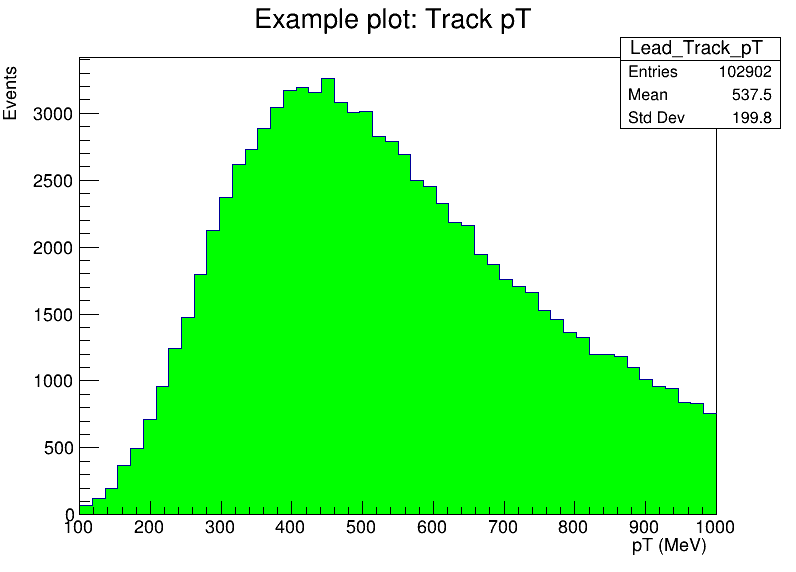

In [11]:
hist_track_pT->SetFillColor(kGreen);
hist_track_pT->Draw();
canvas->Draw();

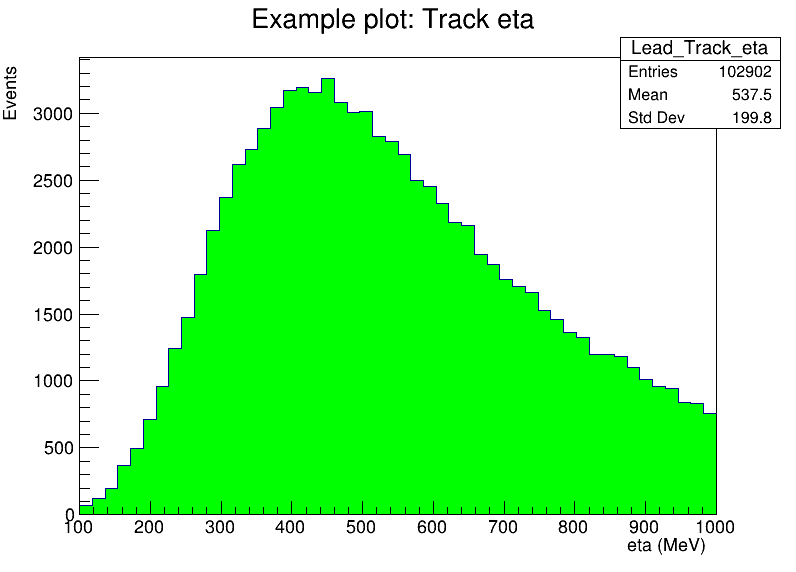

In [26]:
hist_track_eta->SetFillColor(kGreen);
hist_track_eta->Draw();
canvas->Draw();

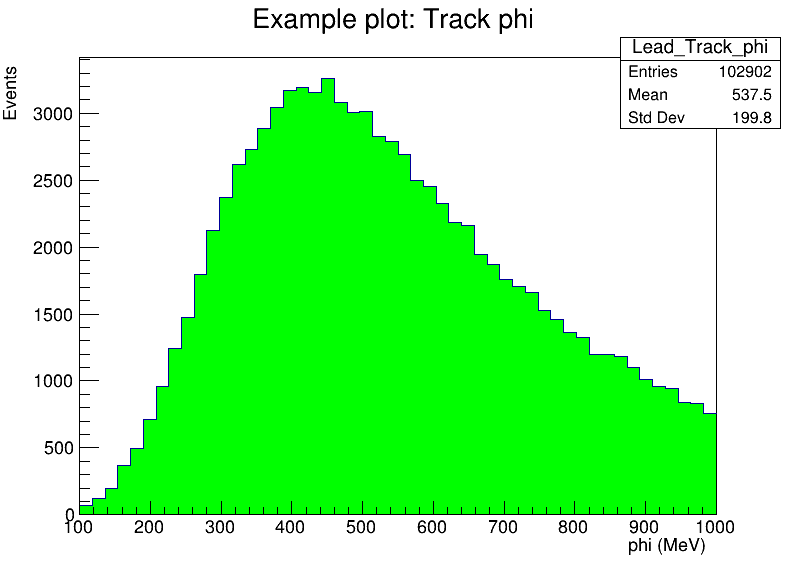

In [25]:
hist_track_phi->SetFillColor(kGreen);
hist_track_phi->Draw();
canvas->Draw();

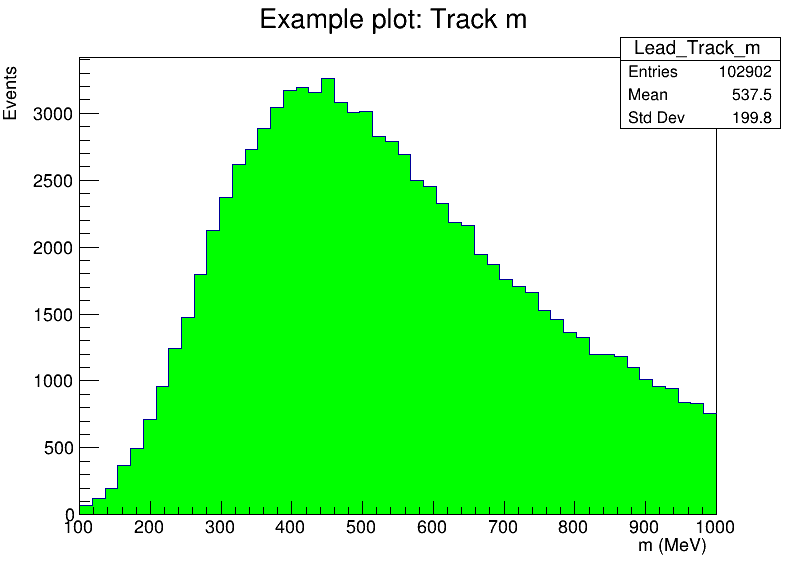

In [24]:
hist_track_m->SetFillColor(kGreen);
hist_track_m->Draw();
canvas->Draw();

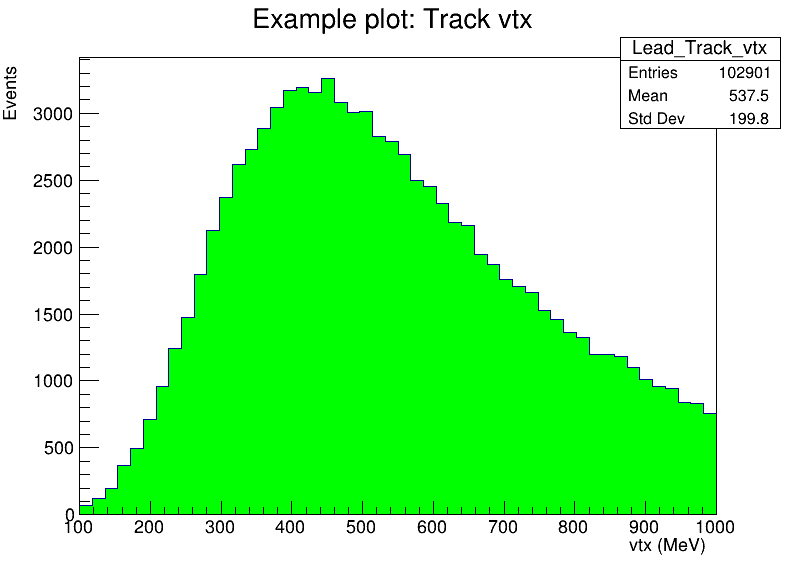

In [23]:
hist_track_vtx->SetFillColor(kGreen);
hist_track_vtx->Draw();
canvas->Draw();

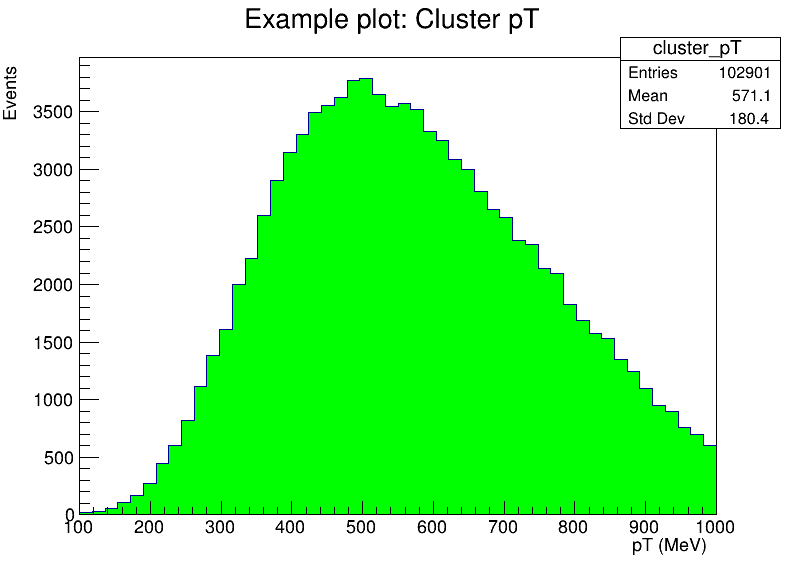

In [17]:
hist_cluster_pT->SetFillColor(kGreen);
hist_cluster_pT->Draw();
canvas->Draw();

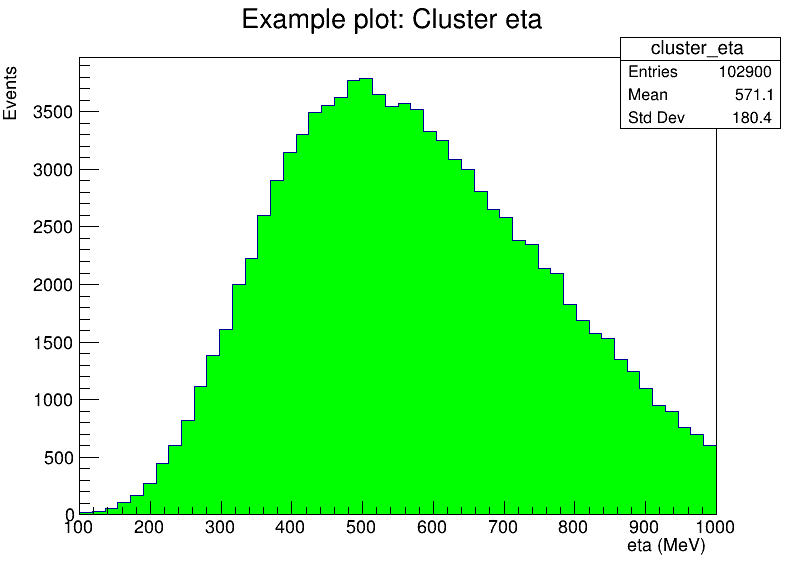

In [18]:
hist_cluster_eta->SetFillColor(kGreen);
hist_cluster_eta->Draw();
canvas->Draw();

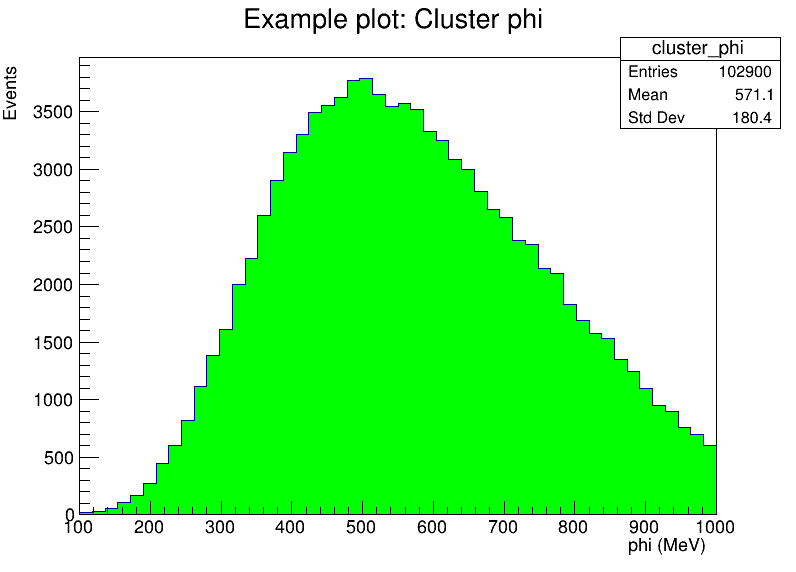

In [19]:
hist_cluster_phi->SetFillColor(kGreen);
hist_cluster_phi->Draw();
canvas->Draw();

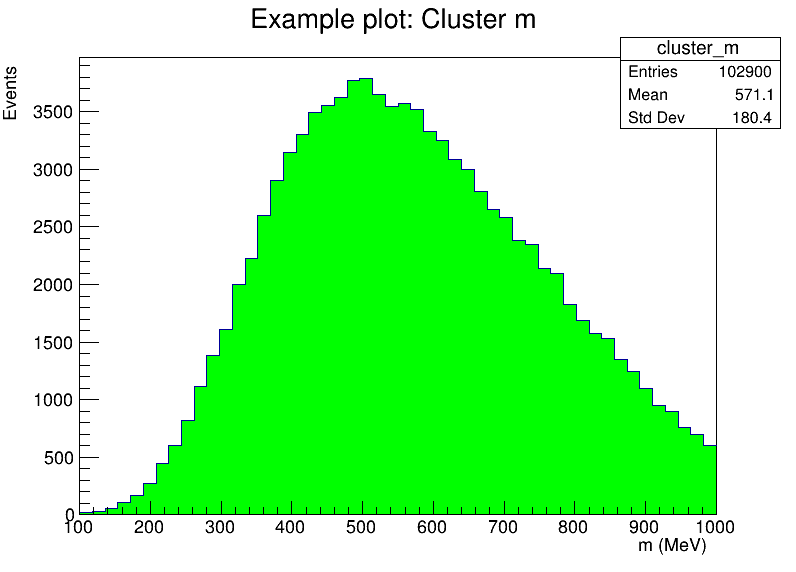

In [27]:
hist_cluster_m->SetFillColor(kGreen);
hist_cluster_m->Draw();
canvas->Draw();

***Lead Particles***

In [ ]:
//Tracks
TH1F *hist_lead_track_pT = new TH1F("Lead_Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_track_eta = new TH1F("Lead_Track_eta","Example plot: Track eta; eta (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_track_phi = new TH1F("Lead_Track_phi","Example plot: Track phi; phi (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_track_m = new TH1F("Lead_Track_m","Example plot: Track m; m (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_track_vtx = new TH1F("Lead_Track_vtx","Example plot: Track vtx; vtx (MeV) ; Events ",50,100,1000);
//Clusters
TH1F *hist_lead_cluster_pT = new TH1F("cluster_pT","Example plot: Cluster pT; pT (MeV) ; Events ",50,100,1000);
TH1F *hist_lead_cluster_eta = new TH1F("cluster_eta","Example plot: Cluster eta; eta (MeV) ; Events ",50,100,1000);
TH1F *hist_cluster_phi = new TH1F("cluster_phi","Example plot: Cluster phi; phi (MeV) ; Events ",50,100,1000);
TH1F *hist_cluster_m = new TH1F("cluster_m","Example plot: Cluster m; m (MeV) ; Events ",50,100,1000);

In [ ]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    // Tracks
    hist_track_pT->Fill(tracks_pt->size());
    hist_track_eta->Fill(tracks_eta->size());
    hist_track_phi->Fill(tracks_phi->size());
    hist_track_m->Fill(tracks_m->size());
    hist_track_vtx->Fill(tracks_vtx->size());
    //Clusters
    hist_cluster_pT->Fill(clusters_pt->size());
    hist_cluster_eta->Fill(clusters_eta->size());
    hist_cluster_phi->Fill(clusters_phi->size());
    hist_cluster_m->Fill(clusters_m->size());

}

std::cout << "Done!" << std::endl;